In [1]:
import seaborn as sns
import numpy as np
import os
import pandas as pd

In [2]:
import scanpy as sc

In [3]:
pbmc = sc.datasets.pbmc3k() #dataset include on scanpy


## QC

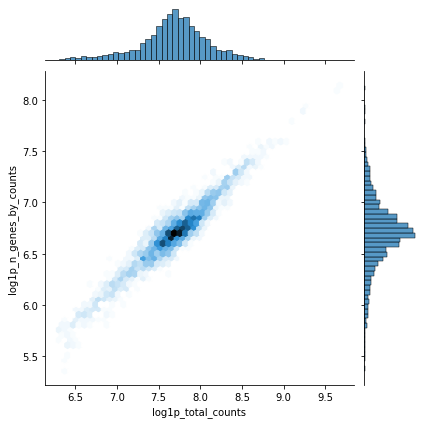

In [4]:
pbmc.var["mito"] = pbmc.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(pbmc, qc_vars=["mito"], inplace=True)
sns.jointplot(
    data=pbmc.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

### violon plot 

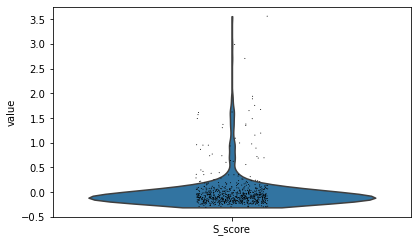

In [1]:
adata = sc.datasets.pbmc68k_reduced()
sc.pl.violin(adata, keys='S_score')

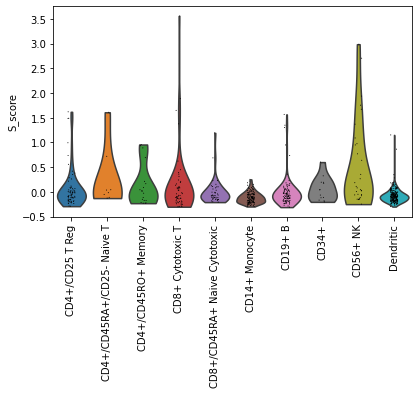

In [2]:
sc.pl.violin(adata, keys='S_score', groupby='bulk_labels', rotation=90)

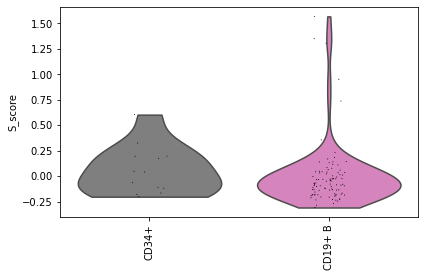

In [3]:
groupby_order = ['CD34+', 'CD19+ B']
sc.pl.violin(adata, keys='S_score', groupby='bulk_labels', rotation=90,
    order=groupby_order)

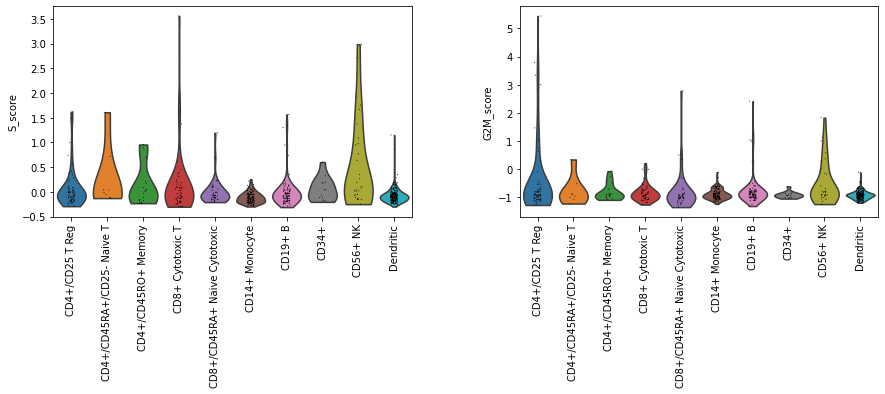

In [4]:
sc.pl.violin(adata, keys=['S_score', 'G2M_score'], groupby='bulk_labels',
    rotation=90)

## norm

In [5]:
from anndata import AnnData

In [6]:
sc.settings.verbosity = 2
np.set_printoptions(precision=2)
adata = AnnData(np.array([
   [3, 3, 3, 6, 6],
   [1, 1, 1, 2, 2],
   [1, 22, 1, 2, 2],
]))
adata.X

C:\Users\33648\AppData\Local\Temp\ipykernel_20120\2142631432.py:3: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(np.array([


array([[ 3.,  3.,  3.,  6.,  6.],
       [ 1.,  1.,  1.,  2.,  2.],
       [ 1., 22.,  1.,  2.,  2.]], dtype=float32)

In [7]:
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
X_norm

normalizing counts per cell
    finished (0:00:00)


array([[0.14, 0.14, 0.14, 0.29, 0.29],
       [0.14, 0.14, 0.14, 0.29, 0.29],
       [0.04, 0.79, 0.04, 0.07, 0.07]], dtype=float32)

In [8]:
X_norm = sc.pp.normalize_total(
    adata, target_sum=1, exclude_highly_expressed=True,
    max_fraction=0.2, inplace=False
)['X']

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['1', '3', '4']
    finished (0:00:00)


In [9]:
X_norm

array([[ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5, 11. ,  0.5,  1. ,  1. ]], dtype=float32)

## PCA

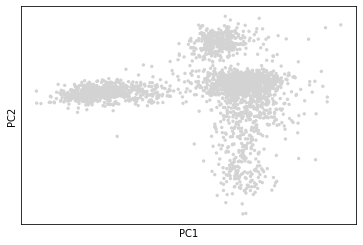

In [10]:
adata = sc.datasets.pbmc3k_processed()
sc.pl.pca(adata)

## clustering

In [11]:
import scanpy.external as sc

In [13]:
from anndata import AnnData
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd

adata = sc.datasets.pbmc3k()
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [14]:
sc.tl.pca(adata, n_comps=100)
sce.tl.phenograph(adata, clustering_algo="louvain", k=30)

computing PCA
    with n_comps=100
    finished (0:00:13)
PhenoGraph clustering


ImportError: please install the latest release of phenograph:
	pip install -U PhenoGraph

In [15]:
sc.tl.tsne(adata, random_state=7)
sc.pl.tsne(
    adata, color = ["pheno_louvain", "pheno_leiden"], s = 100,
    palette = sc.pl.palettes.vega_20_scanpy, legend_fontsize = 10
)

computing tSNE
    using 'X_pca' with n_pcs = 100
    using sklearn.manifold.TSNE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished (0:00:26)


KeyError: 'Could not find key pheno_louvain in .var_names or .obs.columns.'

<Figure size 989.28x288 with 0 Axes>

In [16]:
df = np.random.rand(1000, 40)
dframe = pd.DataFrame(df)
dframe.index, dframe.columns = (map(str, dframe.index), map(str, dframe.columns))
adata = AnnData(dframe)
sc.tl.pca(adata, n_comps=20)
sce.tl.phenograph(adata, clustering_algo="leiden", k=50)
sc.tl.tsne(adata, random_state=1)
sc.pl.tsne(
    adata, color=['pheno_leiden'], s=100,
    palette=sc.pl.palettes.vega_20_scanpy, legend_fontsize=10
)

computing PCA
    with n_comps=20
    finished (0:00:00)
PhenoGraph clustering


C:\Users\33648\AppData\Local\Temp\ipykernel_20120\694839620.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(dframe)


ImportError: please install the latest release of phenograph:
	pip install -U PhenoGraph

## UMAP

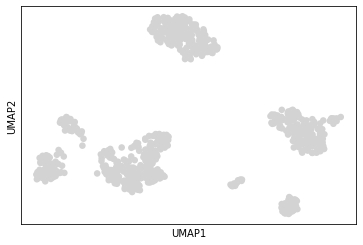

In [17]:
import scanpy as sc
adata = sc.datasets.pbmc68k_reduced()
sc.pl.umap(adata)

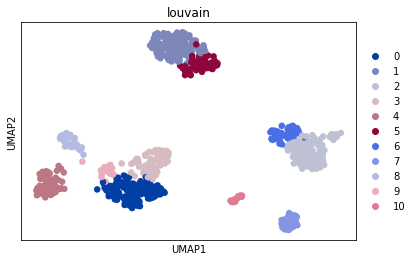

In [18]:
sc.pl.umap(adata, color="louvain")

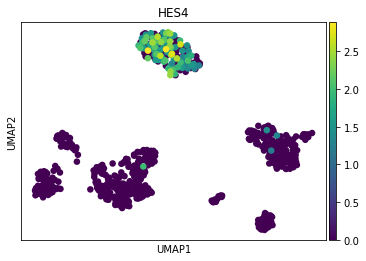

In [19]:
sc.pl.umap(adata, color="HES4")

In [1]:
from ipywidgets import interact, fixed

def plot_graph(f, a, b, c):
    None

interact(
    plot_graph,
    f = fixed(f),
    a = (0,20,1),
    b = ["a", "bé", "cé"],
    c = (0,20,1)
)

NameError: name 'f' is not defined

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc